# Instructions
<hr>

## 1. install YOLO v5

In [1]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...


## 2. install requirements.txt

In [7]:
!pip install -r ./yolov5/requirements.txt

  Using cached GitPython-3.1.32-py3-none-any.whl (188 kB)
  Using cached matplotlib-3.5.3-cp37-cp37m-win_amd64.whl (7.2 MB)


ERROR: Ignored the following versions that require a different python version: 1.22.0 Requires-Python >=3.8; 1.22.1 Requires-Python >=3.8; 1.22.2 Requires-Python >=3.8; 1.22.3 Requires-Python >=3.8; 1.22.4 Requires-Python >=3.8; 1.23.0 Requires-Python >=3.8; 1.23.0rc1 Requires-Python >=3.8; 1.23.0rc2 Requires-Python >=3.8; 1.23.0rc3 Requires-Python >=3.8; 1.23.1 Requires-Python >=3.8; 1.23.2 Requires-Python >=3.8; 1.23.3 Requires-Python >=3.8; 1.23.4 Requires-Python >=3.8; 1.23.5 Requires-Python >=3.8; 1.24.0 Requires-Python >=3.8; 1.24.0rc1 Requires-Python >=3.8; 1.24.0rc2 Requires-Python >=3.8; 1.24.1 Requires-Python >=3.8; 1.24.2 Requires-Python >=3.8; 1.24.3 Requires-Python >=3.8; 1.24.4 Requires-Python >=3.8; 1.25.0 Requires-Python >=3.9; 1.25.0rc1 Requires-Python >=3.9; 1.25.1 Requires-Python >=3.9; 1.25.2 Requires-Python >=3.9; 3.6.0 Requires-Python >=3.8; 3.6.0rc1 Requires-Python >=3.8; 3.6.0rc2 Requires-Python >=3.8; 3.6.1 Requires-Python >=3.8; 3.6.2 Requires-Python >=3.8; 3.

In [2]:
import torch
USE_CUDA = torch.cuda.is_available()
device = torch.device('cuda:0' if USE_CUDA else 'cpu')
print(torch.cuda.is_available())
print(device)

False
cpu


In [6]:
import yaml

with open('keyboard.yaml', 'r') as f:
  data = yaml.full_load(f)

print(data)
data['train'] = 'C:/Users/User/Desktop/fingers detection/YOLOV5 - 2023-08-03/C3Pap_openpose/keyboard/images/train/'

data['val'] = 'C:/Users/User/Desktop/fingers detection/YOLOV5 - 2023-08-03/C3Pap_openpose/keyboard/images/val/'

with open('keyboard.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'names': ['keyboard'], 'nc': 1, 'train': 'C:/Users/User/Desktop/fingers detection/YOLOV5 - 2023-08-03/C3Pap_openpose/keyboard/images/train/', 'val': 'C:/Users/User/Desktop/fingers detection/YOLOV5 - 2023-08-03/C3Pap_openpose/keyboard/images/val/'}
{'names': ['keyboard'], 'nc': 1, 'train': 'C:/Users/User/Desktop/fingers detection/YOLOV5 - 2023-08-03/C3Pap_openpose/keyboard/images/train/', 'val': 'C:/Users/User/Desktop/fingers detection/YOLOV5 - 2023-08-03/C3Pap_openpose/keyboard/images/val/'}


In [7]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [22]:
from glob import glob

image_paths = glob('keyboard/images/image/*.png')
print(len(image_paths))

# train_test_split
from sklearn.model_selection import train_test_split # train,validation split
train_paths, test_paths = train_test_split(image_paths, test_size=0.2, random_state=42)
train_paths, val_paths = train_test_split(train_paths, test_size=0.25, random_state=42)

# 결과 확인
print("훈련 데이터 개수:", len(train_paths))
print("검증 데이터 개수:", len(val_paths))
print("테스트 데이터 개수:", len(test_paths))

# 파일 옮기기
import shutil
import os

def move_files_to_destination(file_paths, destination_folder):
    for file_path in file_paths:
        filename = os.path.basename(file_path)
        destination_path = os.path.join(destination_folder, filename)
        shutil.move(file_path, destination_path)

# 이동할 폴더 경로 설정
train_destination = './keyboard/images/train'
val_destination = './keyboard/images/val'
test_destination = './keyboard/images/test'

# 훈련 데이터 이동
move_files_to_destination(train_paths, train_destination)
# 검증 데이터 이동
move_files_to_destination(val_paths, val_destination)
# 테스트 데이터 이동
move_files_to_destination(test_paths, test_destination)

print("파일 이동이 완료되었습니다.")

2605
훈련 데이터 개수: 1563
검증 데이터 개수: 521
테스트 데이터 개수: 521
파일 이동이 완료되었습니다.


In [36]:
train_paths_cleaned = [path.replace('keyboard/images/image\\', '').replace('.png', '.txt') for path in train_paths]
val_paths_cleaned = [path.replace('keyboard/images/image\\', '').replace('.png', '.txt') for path in val_paths]
test_paths_cleaned = [path.replace('keyboard/images/image\\', '').replace('.png', '.txt') for path in test_paths]

# 결과 확인
print("훈련 데이터 개수:", len(train_paths_cleaned))
print("검증 데이터 개수:", len(val_paths_cleaned))
print("테스트 데이터 개수:", len(test_paths_cleaned))
#print(val_paths_cleaned)

label_paths = glob('keyboard/labels/label/*.txt')
print(len(label_paths))

훈련 데이터 개수: 1563
검증 데이터 개수: 521
테스트 데이터 개수: 521
2605


In [37]:
import shutil
import os

def move_files_with_matching_names(source_folder, destination_folder, file_list):
    # destination_folder가 존재하지 않으면 생성
    os.makedirs(destination_folder, exist_ok=True)

    for file_name in file_list:
        source_path = os.path.join(source_folder, file_name)
        destination_path = os.path.join(destination_folder, file_name)

        # 파일 이름이 일치하면 이동
        if os.path.exists(source_path):
            shutil.move(source_path, destination_path)

# 폴더 경로 설정
source = './keyboard/labels/label'
train_destination = './keyboard/labels/train'
val_destination = './keyboard/labels/val'
test_destination = './keyboard/labels/test'

# 훈련 데이터 이동
move_files_with_matching_names(source, train_destination, [os.path.basename(path) for path in label_paths if os.path.basename(path) in train_paths_cleaned])
# 검증 데이터 이동
move_files_with_matching_names(source, val_destination, [os.path.basename(path) for path in label_paths if os.path.basename(path) in val_paths_cleaned])
# 테스트 데이터 이동
move_files_with_matching_names(source, test_destination, [os.path.basename(path) for path in label_paths if os.path.basename(path) in test_paths_cleaned])

print("파일 이동이 완료되었습니다.")

파일 이동이 완료되었습니다.


# **2.Model Training**
* data : About data yaml file directory
* weights : Pre-Trained Model file directory (.pt), If you enter nothing model training with random weight value
* epochs : epoch 
* batch : batch_size
* cfg: example
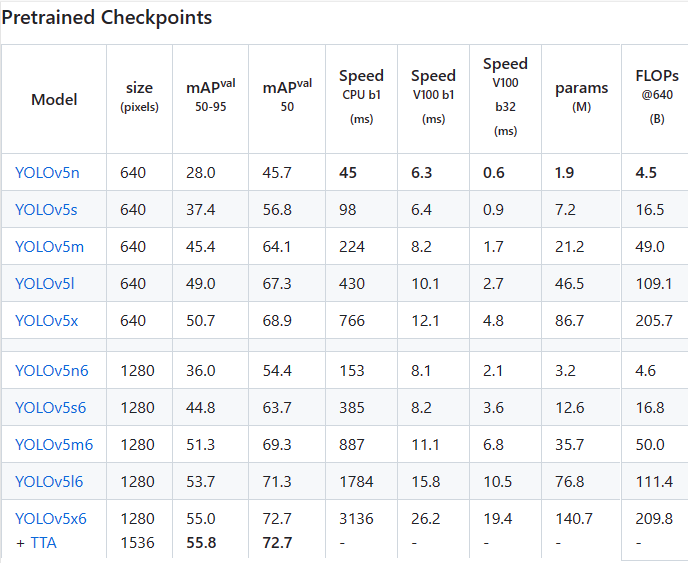

In [ ]:
# epochs 100
!python ./yolov5/train.py --batch 16 --epochs 50 --data keyboard.yaml --cfg ./yolov5/models/yolov5s.yaml --weights yolov5s.pt --name piano_yolov5s_results

The trained model is saved in the directory specified by --name in the format ./yolov5/runs/. In this exercise, it is saved in the directory ./yolov5/runs/train/piano_yolov5s_results/. You can visualize the training results by accessing the results.png file in that path.

### Viewing training results with TensorBoard

In [ ]:
%load_ext tensorboard
%tensorboard --logdir ./yolov5/runs/

# 3. **Model Validation**

The trained model weights are saved in /content/yolov5/runs/train/hijab_yolov5s_results/weights/best.pt, and they are used to validate the model.

In [ ]:
!python ./yolov5/val.py --data ./hijab.yaml --weights ./yolov5/runs/train/hijab_yolov5s_results/weights/best.pt

The validation results are saved in /runs/val/exp/.

# 4. **Model Prediction**
* source : Test Image (or Folder) Directory
* weights : The path to the weight file (in .pt format) after training is complete.
* conf : conf_threshold value (0 ~ 1)


To draw bounding boxes, the class score should exceed the specified value. The results are saved in the runs/detect/exp directory. If you repeat the predictions, folders such as exp1, exp2, exp3, etc., will be created in the runs/detect directory, and the results will be recorded in those folders.

In [ ]:
from glob import glob
test_img_list = glob('./hijab/images/test/**/*.jpeg', recursive=True)
test_img_list2 = glob('./hijab/images/test/**/*.jpg', recursive=True)
print("length:", len(test_img_list), len(test_img_list2))
print(test_img_list)
print(test_img_list2)

test_dataset = test_img_list + test_img_list2
print(len(test_dataset))

In [ ]:
import os
from IPython.display import Image

In [ ]:
val_img_path = test_dataset[30]
!python ./yolov5/detect.py --weights ./yolov5/runs/train/hijab_yolov5s_results/weights/best.pt --source "{val_img_path}"
Image(os.path.join('./yolov5/runs/detect/exp/', os.path.basename(val_img_path)))

In [ ]:
val_img_path = test_dataset[14]
!python ./yolov5/detect.py --weights ./yolov5/runs/train/hijab_yolov5s_results/weights/best.pt --source "{val_img_path}"
Image(os.path.join('./yolov5/runs/detect/exp2/', os.path.basename(val_img_path)))